**Assignment 4**

Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset. Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [82]:
df = pd.read_csv("diabetes.csv")

In [84]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [85]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

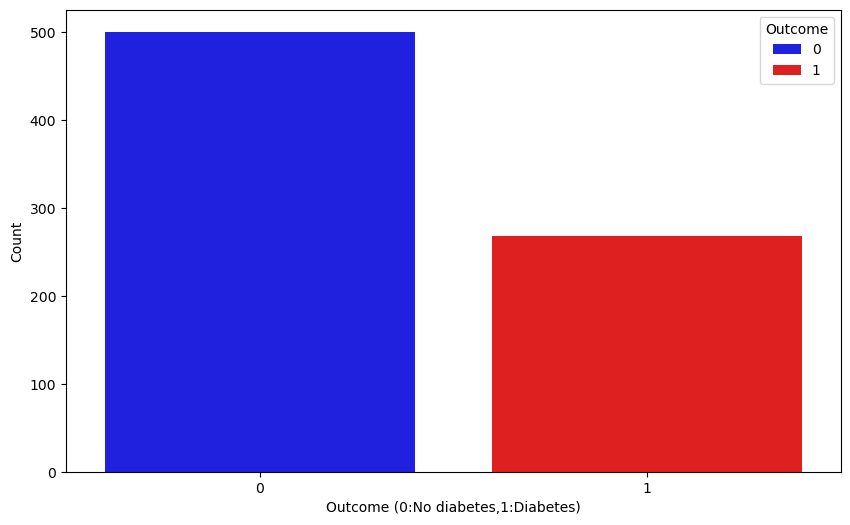

In [89]:
plt.figure(figsize = (10,6))
sns.countplot(x="Outcome",hue="Outcome",data=df,palette=["blue","red"])
plt.xlabel("Outcome (0:No diabetes,1:Diabetes)")
plt.ylabel("Count")
plt.show()

In [90]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [91]:
train,test = train_test_split(df,test_size=0.20,random_state=0)
x_train,y_train = train.drop(["Outcome"],axis=1).values,train["Outcome"].values
x_test,y_test = test.drop(["Outcome"],axis=1).values,test["Outcome"].values

In [92]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [93]:
knn = KNeighborsClassifier()

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn.predict(x_test)

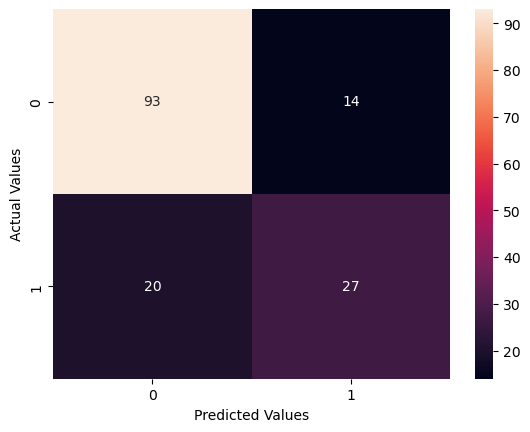

In [101]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



In [103]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 Score : ",f1)

Accuracy :  0.7792207792207793
Precision :  0.6585365853658537
Recall :  0.574468085106383
F1 Score :  0.6136363636363636


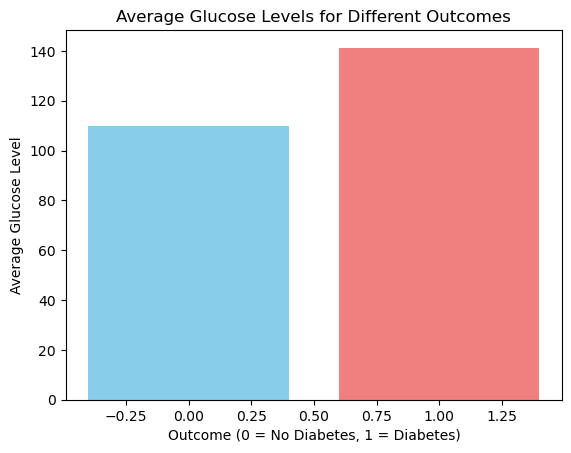

In [104]:
# Group by Outcome and calculate the mean glucose level for each Outcome class
mean_glucose = df.groupby('Outcome')['Glucose'].mean()

# Plotting the bar chart
plt.bar(mean_glucose.index, mean_glucose.values, color=['skyblue', 'lightcoral'])

# Set titles and labels
plt.title('Average Glucose Levels for Different Outcomes')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Average Glucose Level')

# Display the plot
plt.show()